# **Data Classification**

### **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV ,StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,roc_curve, roc_auc_score , auc,confusion_matrix ,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

## **Exploratory Data Analysis**

### **Reading Data**

In [2]:
newborn_health_train= pd.read_csv('/kaggle/input/new-born-data/newborn_health_monitoring_with_risk.csv')

In [3]:
newborn_health_train.head()

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-10,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-11,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-12,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-13,4,3.48,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.3,50.0,31.9,2024-12-14,5,3.50,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk


In [4]:
newborn_health_train.shape

(3000, 25)

In [5]:
newborn_health_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   baby_id                      3000 non-null   object 
 1   name                         3000 non-null   object 
 2   gender                       3000 non-null   object 
 3   gestational_age_weeks        3000 non-null   float64
 4   birth_weight_kg              3000 non-null   float64
 5   birth_length_cm              3000 non-null   float64
 6   birth_head_circumference_cm  3000 non-null   float64
 7   date                         3000 non-null   object 
 8   age_days                     3000 non-null   int64  
 9   weight_kg                    3000 non-null   float64
 10  length_cm                    3000 non-null   float64
 11  head_circumference_cm        3000 non-null   float64
 12  temperature_c                3000 non-null   float64
 13  heart_rate_bpm    

In [6]:
newborn_health_train.describe()

,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,100.000000
mean,38.878000,3.205000,49.727000,34.128000,15.500000,3.669730,50.508000,34.438900,37.002933,139.682000,39.421333,97.473000,9.450000,6.470000,2.448333,4.163467,8.400000
std,1.570076,0.561555,2.145065,1.486254,8.656884,0.621355,2.196846,1.500893,0.310747,10.139386,4.999481,1.048318,1.707182,1.700803,1.699106,2.861971,1.163415
min,35.400000,1.860000,45.100000,31.200000,1.000000,1.790000,45.000000,31.100000,35.800000,100.000000,23.000000,94.000000,7.000000,4.000000,0.000000,0.000000,7.000000
25%,37.800000,2.870000,48.475000,32.975000,8.000000,3.220000,49.100000,33.300000,36.800000,133.000000,36.000000,97.000000,8.000000,5.000000,1.000000,2.500000,7.000000
50%,38.800000,3.165000,49.550000,34.100000,15.500000,3.660000,50.400000,34.400000,37.000000,140.000000,39.000000,97.000000,9.000000,6.000000,2.000000,3.300000,8.000000
75%,40.100000,3.625000,51.025000,34.800000,23.000000,4.100000,51.800000,35.300000,37.200000,146.000000,43.000000,98.000000,11.000000,8.000000,4.000000,4.300000,9.250000
max,43.000000,4.470000,55.800000,38.100000,30.000000,5.410000,57.400000,38.700000,38.100000,173.000000,57.000000,101.000000,12.000000,9.000000,5.000000,15.000000,10.000000


In [7]:
newborn_health_train.columns

Index(['baby_id', 'name', 'gender', 'gestational_age_weeks', 'birth_weight_kg',
       'birth_length_cm', 'birth_head_circumference_cm', 'date', 'age_days',
       'weight_kg', 'length_cm', 'head_circumference_cm', 'temperature_c',
       'heart_rate_bpm', 'respiratory_rate_bpm', 'oxygen_saturation',
       'feeding_type', 'feeding_frequency_per_day', 'urine_output_count',
       'stool_count', 'jaundice_level_mg_dl', 'apgar_score',
       'immunizations_done', 'reflexes_normal', 'risk_level'],
      dtype='object')

**Data Visualization:**

To show corrleation between features:

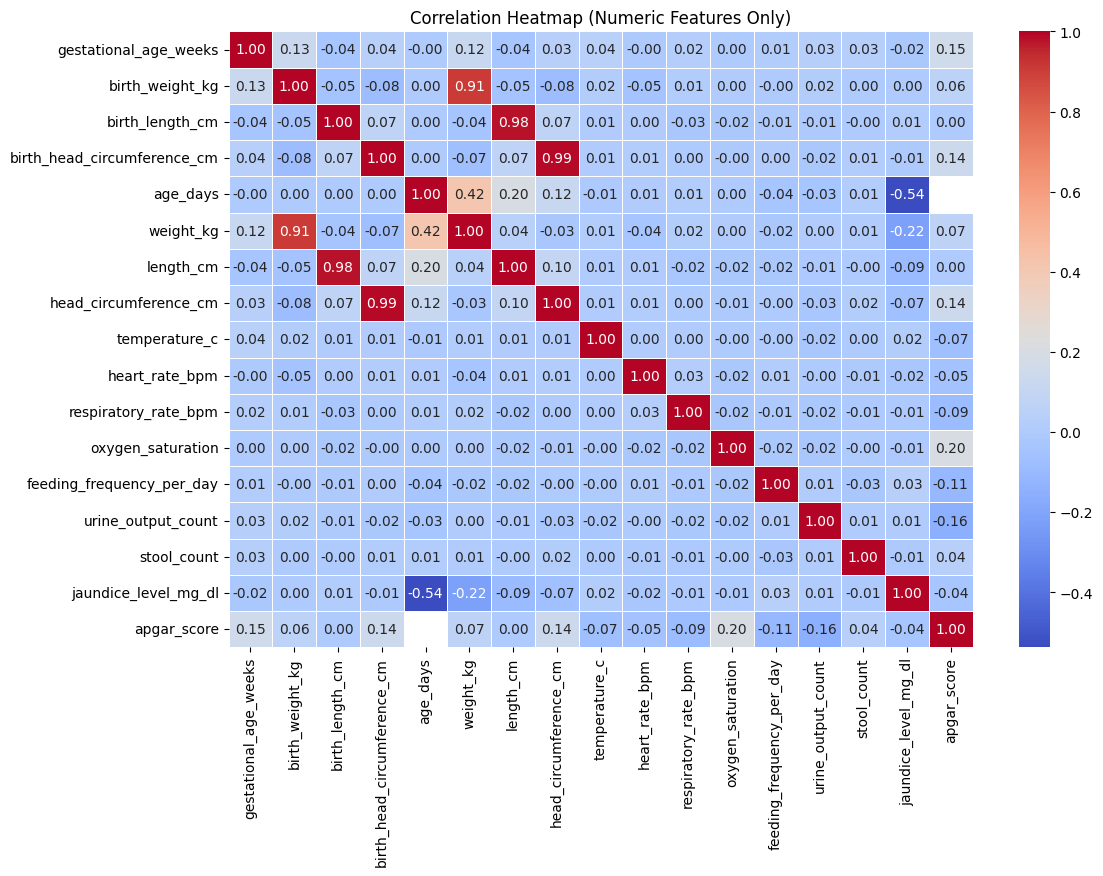

In [8]:
# to calculate coorelation

# take only numerical columns
numeric_df = newborn_health_train.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

To show features by Histplot:

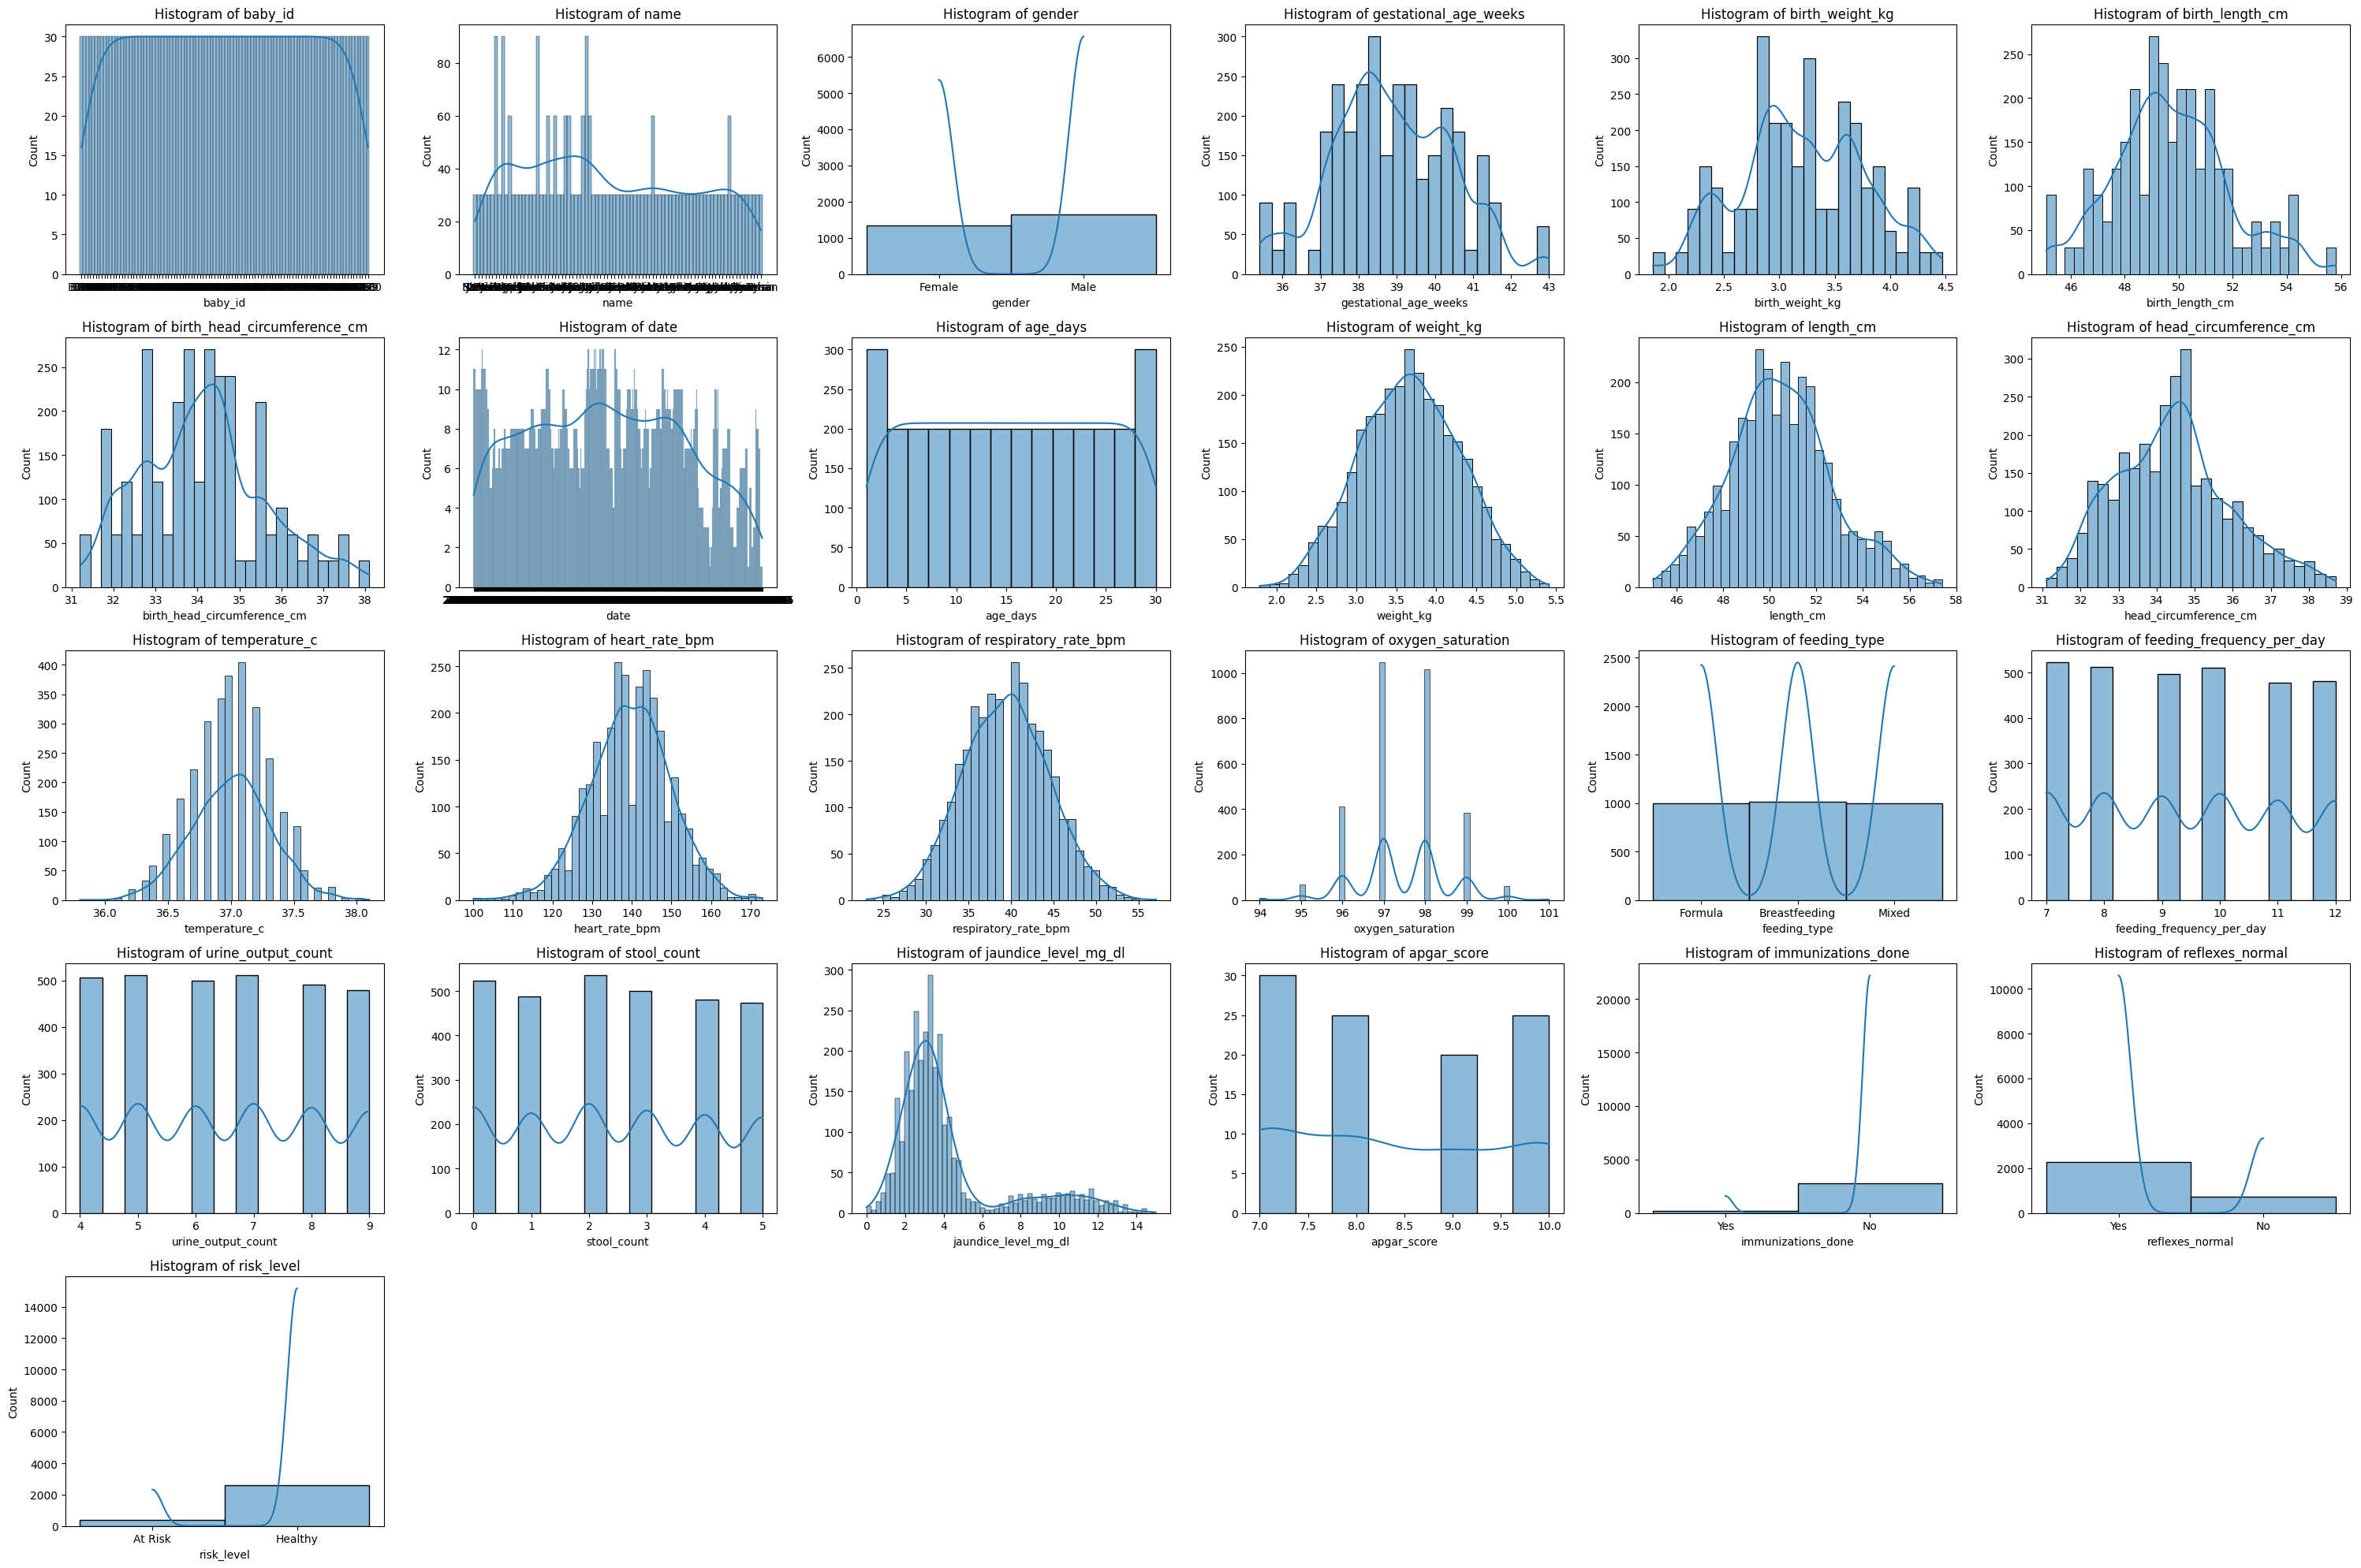

In [9]:
cols = newborn_health_train.columns
n = len(cols)

# numbers of columns at row
cols_per_row = 6
rows = -(-n // cols_per_row)   # ceil(n/5)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 4*rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    try:
        sns.histplot(newborn_health_train[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Histogram of {col}")
    except Exception as e:
        axes[i].set_visible(False)  # if columns not a number not visible

# remove empty values
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Data Cleaning**

### **Nulls**

In [10]:
newborn_health_train.isnull().sum()

baby_id                           0
name                              0
gender                            0
gestational_age_weeks             0
birth_weight_kg                   0
birth_length_cm                   0
birth_head_circumference_cm       0
date                              0
age_days                          0
weight_kg                         0
length_cm                         0
head_circumference_cm             0
temperature_c                     0
heart_rate_bpm                    0
respiratory_rate_bpm              0
oxygen_saturation                 0
feeding_type                      0
feeding_frequency_per_day         0
urine_output_count                0
stool_count                       0
jaundice_level_mg_dl              0
apgar_score                    2900
immunizations_done                0
reflexes_normal                   0
risk_level                        0
dtype: int64

Drop **apgar_score** becaue it have more than 90% Nulls

In [11]:
newborn_health_train.drop(['apgar_score'],axis=1,inplace = True)

To ensure if found any nulls at any columns:

In [12]:
newborn_health_train.isnull().sum()

baby_id                        0
name                           0
gender                         0
gestational_age_weeks          0
birth_weight_kg                0
birth_length_cm                0
birth_head_circumference_cm    0
date                           0
age_days                       0
weight_kg                      0
length_cm                      0
head_circumference_cm          0
temperature_c                  0
heart_rate_bpm                 0
respiratory_rate_bpm           0
oxygen_saturation              0
feeding_type                   0
feeding_frequency_per_day      0
urine_output_count             0
stool_count                    0
jaundice_level_mg_dl           0
immunizations_done             0
reflexes_normal                0
risk_level                     0
dtype: int64

we found there is no Nulls at our data

## **Outliers**

For visualization outliers at non objected features we use this code:

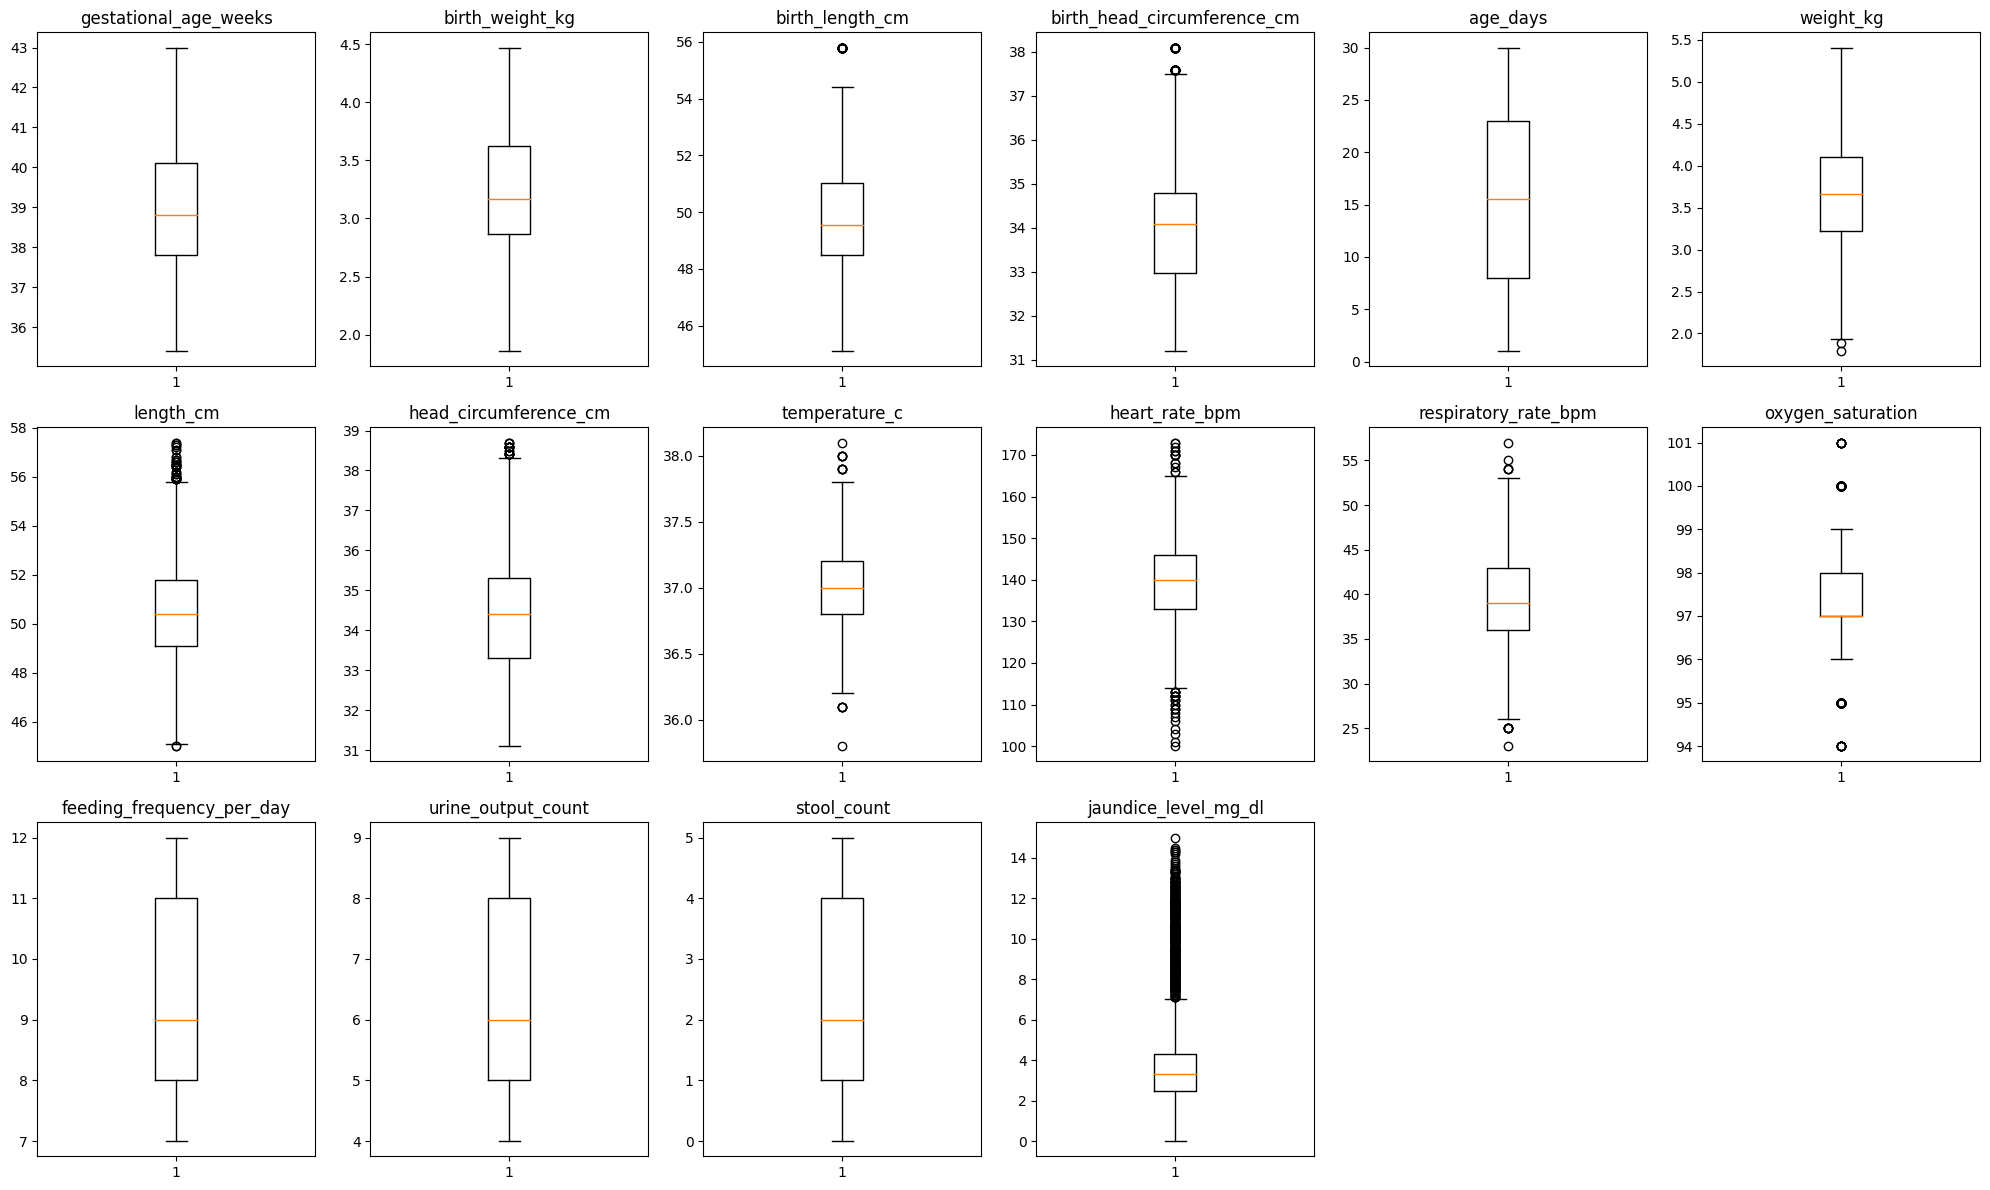

In [13]:
# To extract only numerical columns
num_cols = newborn_health_train.select_dtypes(include=['number']).columns

# Number of rows and columns
n_cols = 6
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))

axes = axes.flatten()  # Turn array to list to easy use

for i, col in enumerate(num_cols):
    axes[i].boxplot(newborn_health_train[col])
    axes[i].set_title(col)

# Remove empty value
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [14]:
newborn_health_train.columns

Index(['baby_id', 'name', 'gender', 'gestational_age_weeks', 'birth_weight_kg',
       'birth_length_cm', 'birth_head_circumference_cm', 'date', 'age_days',
       'weight_kg', 'length_cm', 'head_circumference_cm', 'temperature_c',
       'heart_rate_bpm', 'respiratory_rate_bpm', 'oxygen_saturation',
       'feeding_type', 'feeding_frequency_per_day', 'urine_output_count',
       'stool_count', 'jaundice_level_mg_dl', 'immunizations_done',
       'reflexes_normal', 'risk_level'],
      dtype='object')

To remove outliers from **length_cm**:

To know min and max value at **length_cm** feature:

In [15]:
newborn_health_train['length_cm'].min(),newborn_health_train['length_cm'].max()

(45.0, 57.4)

In [16]:
x = 'length_cm'
q75,q25 = np.percentile(newborn_health_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (1.5 * IQR)
Lower = q25 - (2 * IQR)
newborn_health_train.loc[newborn_health_train[x] <Lower ,x] = np.nan
newborn_health_train.loc[newborn_health_train[x] > Upper,x] = np.nan

Visualization after remove outliers by Boxplot

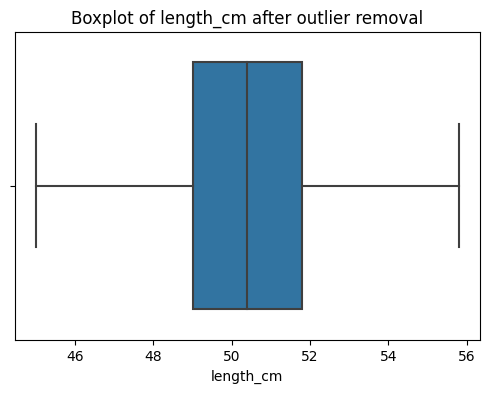

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=newborn_health_train[x])
plt.title(f'Boxplot of {x} after outlier removal')
plt.show()

To check min and max values after removing outliers:

In [18]:
newborn_health_train['length_cm'].min(),newborn_health_train['length_cm'].max()

(45.0, 55.8)

Medically normal range of **length_cm** of newborn 45 cm - 55 cm so even if 57.4 still in slightly in normal so we removed outliers not affected on prediction

For remove outliers from **head_circumference_cm**

To know min and max value at **head_circumference_cm** feature:

In [19]:
newborn_health_train['head_circumference_cm'].min(),newborn_health_train['head_circumference_cm'].max()

(31.1, 38.7)

In [20]:
x = 'head_circumference_cm'
q75,q25 = np.percentile(newborn_health_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (1.5 * IQR)
Lower = q25 - (2 * IQR)
newborn_health_train.loc[newborn_health_train[x] <Lower ,x] = np.nan
newborn_health_train.loc[newborn_health_train[x] > Upper,x] = np.nan

Visualization after remove outliers by Boxplot

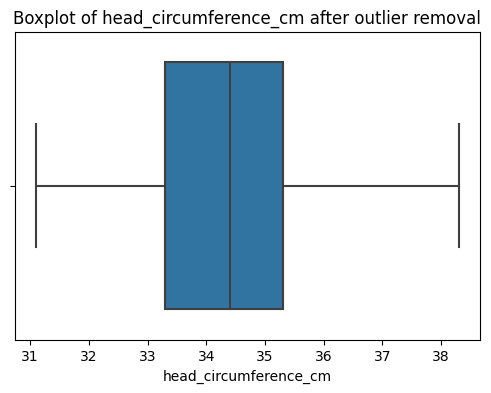

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x=newborn_health_train['head_circumference_cm'])
plt.title(f'Boxplot of {x} after outlier removal')
plt.show()

To check min and max values after removing outliers:

In [22]:
newborn_health_train['head_circumference_cm'].min(),newborn_health_train['head_circumference_cm'].max()

(31.1, 38.3)

Medically normal range of **head_circumference_cm** of newborn 32 cm - 38 cm so even if this range (31.1 cm, 38.3 cm) still in slightly in normal so we removed outliers not affected on prediction

To remove outliers from **temperature_c**:

To know min and max value at **temperature_c** feature:

In [23]:
newborn_health_train['temperature_c'].min(),newborn_health_train['temperature_c'].max()

(35.8, 38.1)

In [24]:
x = 'temperature_c'
q75,q25 = np.percentile(newborn_health_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (2 * IQR)
Lower = q25 - (1.5 * IQR)
newborn_health_train.loc[newborn_health_train[x] <Lower ,x] = np.nan
newborn_health_train.loc[newborn_health_train[x] > Upper,x] = np.nan

Visualization after remove outliers by Boxplot

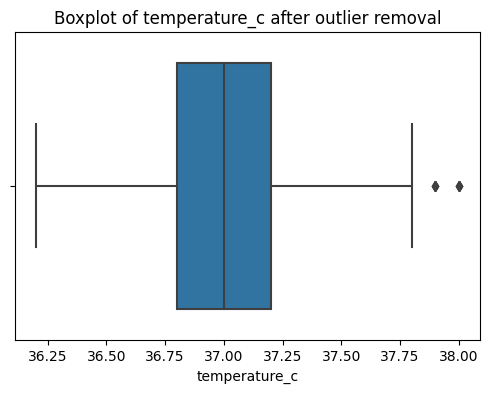

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=newborn_health_train['temperature_c'])
plt.title(f'Boxplot of {x} after outlier removal')
plt.show()

To check min and max values after removing outliers:

In [26]:
newborn_health_train['temperature_c'].min(),newborn_health_train['temperature_c'].max()

(36.2, 38.0)

Medically normal range of **temperature_c** of newborn 36.5 C - 37.5 C so we let some outliers because it affected ao prediction

To remove outliers from **heart_rate_bpm**:

To know min and max value at **heart_rate_bpm** feature:

In [27]:
newborn_health_train['heart_rate_bpm'].min(),newborn_health_train['heart_rate_bpm'].max()

(100, 173)

In [28]:
x = 'heart_rate_bpm'
q75,q25 = np.percentile(newborn_health_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (1.5 * IQR)
Lower = q25 - (1.5 * IQR)
newborn_health_train.loc[newborn_health_train[x] <Lower ,x] = np.nan
newborn_health_train.loc[newborn_health_train[x] > Upper,x] = np.nan

Visualization after remove outliers by Boxplot

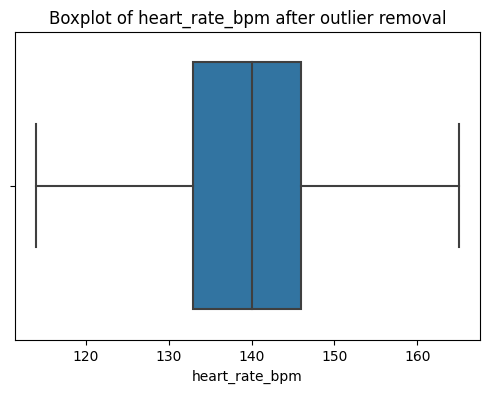

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x=newborn_health_train['heart_rate_bpm'])
plt.title(f'Boxplot of {x} after outlier removal')
plt.show()

To check min and max values after removing outliers:

In [30]:
newborn_health_train['heart_rate_bpm'].min(),newborn_health_train['heart_rate_bpm'].max()

(114.0, 165.0)

Medically normal range of **heart_rate_bpm** of newborn 120 bpm - 160 bpm so even if this range (100 bpm, 173 bpm) still in slightly in normal so we removed outliers not affected on prediction

To remove outliers from **respiratory_rate_bpm**:

To know min and max value at **respiratory_rate_bpm** feature:

In [31]:
newborn_health_train['respiratory_rate_bpm'].min(),newborn_health_train['respiratory_rate_bpm'].max()

(23, 57)

In [32]:
x = 'respiratory_rate_bpm'
q75,q25 = np.percentile(newborn_health_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (1.5 * IQR)
Lower = q25 - (1.5 * IQR)
newborn_health_train.loc[newborn_health_train[x] <Lower ,x] = np.nan
newborn_health_train.loc[newborn_health_train[x] > Upper,x] = np.nan

Visualization after remove outliers by Boxplot

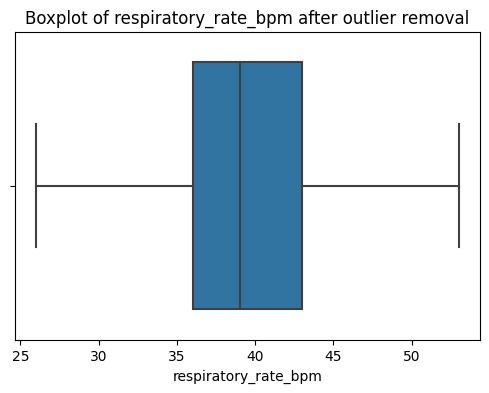

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x=newborn_health_train['respiratory_rate_bpm'])
plt.title(f'Boxplot of {x} after outlier removal')
plt.show()

To check min and max values after removing outliers:

In [34]:
newborn_health_train['respiratory_rate_bpm'].min(),newborn_health_train['respiratory_rate_bpm'].max()

(26.0, 53.0)

Medically normal range of **respiratory_rate_bpm** of newborn 30 bpm - 60 bpm so even if this range (23 bpm, 57 bpm) still in slightly in normal so we removed outliers not affected on prediction

To remove outliers from **oxygen_saturation**:

To know min and max value at **oxygen_saturation** feature:

In [35]:
newborn_health_train['oxygen_saturation'].min(),newborn_health_train['oxygen_saturation'].max()

(94, 101)

In [36]:
x = 'oxygen_saturation'
q75,q25 = np.percentile(newborn_health_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (1.5 * IQR)
Lower = q25 - (1.8 * IQR)
newborn_health_train.loc[newborn_health_train[x] <Lower ,x] = np.nan
newborn_health_train.loc[newborn_health_train[x] > Upper,x] = np.nan

Visualization after remove outliers by Boxplot

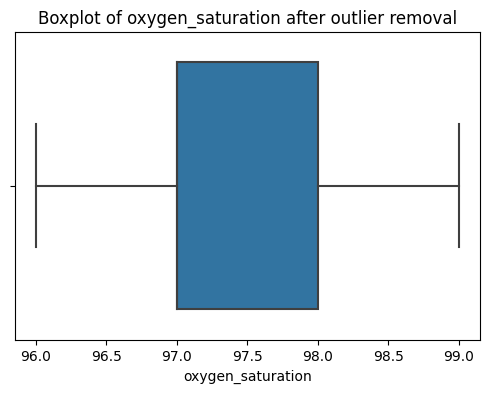

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x=newborn_health_train['oxygen_saturation'])
plt.title(f'Boxplot of {x} after outlier removal')
plt.show()

To check min and max values after removing outliers:

In [38]:
newborn_health_train['oxygen_saturation'].min(),newborn_health_train['oxygen_saturation'].max()

(96.0, 99.0)

Medically normal range of **oxygen_saturation** of newborn 95% - 100% so even if this range (94, 101) still in slightly in normal and 101 is wrong so we removed outliers not affected on prediction

To remove outliers from **jaundice_level_mg_dl**:

To know min and max value at **jaundice_level_mg_dl** feature:

In [39]:
newborn_health_train['jaundice_level_mg_dl'].min(),newborn_health_train['jaundice_level_mg_dl'].max()

(0.0, 15.0)

In [40]:
x = 'jaundice_level_mg_dl'
q75,q25 = np.percentile(newborn_health_train.loc[:,x],[75,25])
IQR = q75 - q25
Upper = q75 + (.9 * IQR)
Lower = q25 - (1.2 * IQR)
newborn_health_train.loc[newborn_health_train[x] <Lower ,x] = np.nan
newborn_health_train.loc[newborn_health_train[x] > Upper,x] = np.nan

Visualization after remove outliers by Boxplot

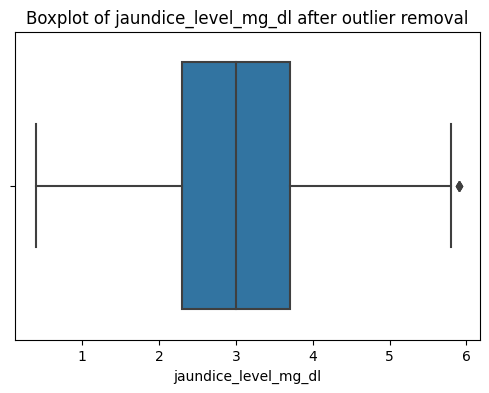

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x=newborn_health_train['jaundice_level_mg_dl'])
plt.title(f'Boxplot of {x} after outlier removal')
plt.show()

To check min and max values after removing outliers:

In [42]:
newborn_health_train['jaundice_level_mg_dl'].min(),newborn_health_train['jaundice_level_mg_dl'].max()

(0.4, 5.9)

Medically normal range of **jaundice_level_mg_dl** of newborn 0 mg/dL - 15 mg/dL so even if this range (0.0, 15.0) is in normal so we removed outliers not affected on prediction

for replacement nan values by mean after removing outliers

In [43]:
columns = ['length_cm','head_circumference_cm','temperature_c','heart_rate_bpm','respiratory_rate_bpm','oxygen_saturation','jaundice_level_mg_dl' ]
for col in columns:
  mean_value = newborn_health_train[col].mean()
  newborn_health_train[col].fillna(mean_value, inplace=True)

In [44]:
newborn_health_train.shape

(3000, 24)

## **Feature Engneering & Processing**

For extract objected columns and there unique values:

In [45]:
for col in newborn_health_train.columns :
  if newborn_health_train[col].dtype == 'object':
    print(f'{col} : {newborn_health_train[col].unique()}')

baby_id : ['B001' 'B002' 'B003' 'B004' 'B005' 'B006' 'B007' 'B008' 'B009' 'B010'
 'B011' 'B012' 'B013' 'B014' 'B015' 'B016' 'B017' 'B018' 'B019' 'B020'
 'B021' 'B022' 'B023' 'B024' 'B025' 'B026' 'B027' 'B028' 'B029' 'B030'
 'B031' 'B032' 'B033' 'B034' 'B035' 'B036' 'B037' 'B038' 'B039' 'B040'
 'B041' 'B042' 'B043' 'B044' 'B045' 'B046' 'B047' 'B048' 'B049' 'B050'
 'B051' 'B052' 'B053' 'B054' 'B055' 'B056' 'B057' 'B058' 'B059' 'B060'
 'B061' 'B062' 'B063' 'B064' 'B065' 'B066' 'B067' 'B068' 'B069' 'B070'
 'B071' 'B072' 'B073' 'B074' 'B075' 'B076' 'B077' 'B078' 'B079' 'B080'
 'B081' 'B082' 'B083' 'B084' 'B085' 'B086' 'B087' 'B088' 'B089' 'B090'
 'B091' 'B092' 'B093' 'B094' 'B095' 'B096' 'B097' 'B098' 'B099' 'B100']
name : ['Sara' 'Nicole' 'James' 'Donald' 'Yvonne' 'Wendy' 'Michael' 'Jerome'
 'Christopher' 'Donna' 'Mary' 'Sandra' 'Cole' 'Jeffrey' 'Stephen' 'Erin'
 'Ruth' 'Robin' 'David' 'Jasmine' 'Zachary' 'Shannon' 'Erika' 'Charles'
 'Heather' 'Julie' 'Daniel' 'Adam' 'Anthony' 'Brett' 'Abi

Extract only important objected features with there unique values:

In [46]:
objecte_columns = ['gender','feeding_type','immunizations_done','reflexes_normal','risk_level']
for col in objecte_columns:
  print(f'{col} :{newborn_health_train[col].unique()}')

gender :['Female' 'Male']
feeding_type :['Formula' 'Breastfeeding' 'Mixed']
immunizations_done :['Yes' 'No']
reflexes_normal :['Yes' 'No']
risk_level :['At Risk' 'Healthy']


we use **Lable encoder** to turn categorical features **(gender,immunizations_done,reflexes_normal ,risk_level )** to numbers that can make model deal with in training and prediction

In [47]:
categorical_features = ['gender','immunizations_done','reflexes_normal','risk_level']

In [48]:
Label_Encoder = LabelEncoder()

In [49]:
for col in categorical_features:
    newborn_health_train[col] = Label_Encoder.fit_transform(newborn_health_train[col])

We use **OneHotEncoder** to turn other categorical features to numerical features:

In [50]:
newborn_health_train = pd.get_dummies(newborn_health_train, columns=['feeding_type'], drop_first=True)

So we check our data after featureExtraction :

In [51]:
newborn_health_train.head()

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,immunizations_done,reflexes_normal,risk_level,feeding_type_Formula,feeding_type_Mixed
0,B001,Sara,0,40.2,3.3,50.0,31.9,2024-12-10,1,3.28,...,98.0,11,9,0,4.20000,1,1,0,True,False
1,B001,Sara,0,40.2,3.3,50.0,31.9,2024-12-11,2,3.35,...,99.0,11,5,2,3.02296,0,0,0,True,False
2,B001,Sara,0,40.2,3.3,50.0,31.9,2024-12-12,3,3.35,...,97.0,7,6,5,3.02296,0,0,1,False,False
3,B001,Sara,0,40.2,3.3,50.0,31.9,2024-12-13,4,3.48,...,97.0,11,8,4,3.02296,0,1,1,False,True
4,B001,Sara,0,40.2,3.3,50.0,31.9,2024-12-14,5,3.50,...,96.0,11,7,1,3.02296,0,1,0,False,False


In [52]:
newborn_health_train.shape

(3000, 25)

To know if data of Output feature **risk_level** is balance or not :

In [53]:
newborn_health_train['risk_level'].value_counts()

risk_level
1    2602
0     398
Name: count, dtype: int64

There is implance data at output feature

## **Splitting data**

We drop non important feature which not affected on prediction:

In [54]:
newborn_health_train = newborn_health_train.drop(['baby_id','name','date'],axis=1)

We splitting data to training data and testing data:

In [55]:
X = newborn_health_train.drop(['risk_level'],axis=1)
y = newborn_health_train['risk_level']

In [56]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (2250, 21)
X_test shape is  (750, 21)
y_train shape is  (2250,)
y_test shape is  (750,)


## **Model training**

We Applying **RandomForestClassifier Model**

In [57]:
#Applying RandomForestClassifier Model

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33,class_weight="balanced") # we added (class_weight="balanced) becaue unblanced data ot output
RandomForestClassifierModel.fit(X_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.8871111111111111
RandomForestClassifierModel Test Score is :  0.8813333333333333
RandomForestClassifierModel features importances are :  [2.58936302e-04 1.33755064e-02 1.35679329e-02 2.28258496e-02
 4.95471574e-03 3.63159787e-01 1.32042890e-01 3.85756648e-02
 1.00850687e-02 1.41869906e-02 1.39651724e-01 1.49099481e-02
 3.59811566e-02 7.20207649e-03 4.26907454e-04 7.80540374e-03
 1.38145666e-01 4.18145916e-02 1.02918414e-03 0.00000000e+00
 0.00000000e+00]
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [1 1 1 1 1 1 1 1 1 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.30860497 0.69139503]
 [0.36601659 0.63398341]
 [0.35634283 0.64365717]
 [0.29723385 0.70276615]
 [0.33618877 0.66381123]
 [0.38765955 0.61234045]
 [0.47295967 0.52704033]
 [0.37308626 0.62691374]
 [0.38641629 0.61358371]
 [0.32147972 0.67852028]]


### **Model Evaluation**

To evaluate model if predicted values is near to real values:

To show Cross-Validation Score

In [58]:
cv_scores = cross_val_score(RandomForestClassifierModel, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.86333333 0.9        0.88333333 0.88       0.89333333]
Mean CV Score: 0.884


To show **Classification Report (precision, recall, f1-score)**

In [59]:
y_pred = RandomForestClassifierModel.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score     support
0              0.503650  0.766667  0.607930   90.000000
1              0.965742  0.896970  0.930086  660.000000
accuracy       0.881333  0.881333  0.881333    0.881333
macro avg      0.734696  0.831818  0.769008  750.000000
weighted avg   0.910291  0.881333  0.891428  750.000000


Visualization by **Confusion Metrix**

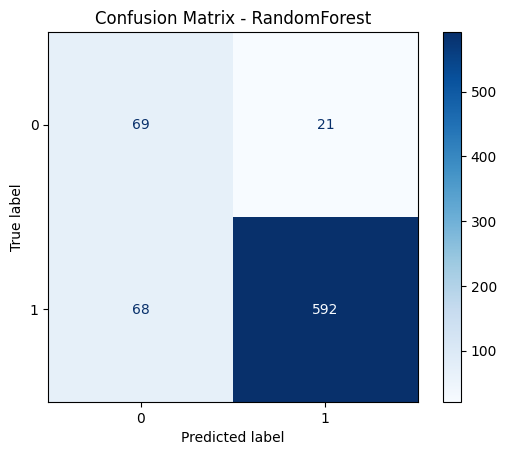

In [60]:
y_pred = RandomForestClassifierModel.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - RandomForest")
plt.show()

From confusion metrics we found model predict 592 of (1 class) true and 68 false & predict 69 of (0 class) true and 21 false

To show **ROC Curve & AUC Score**

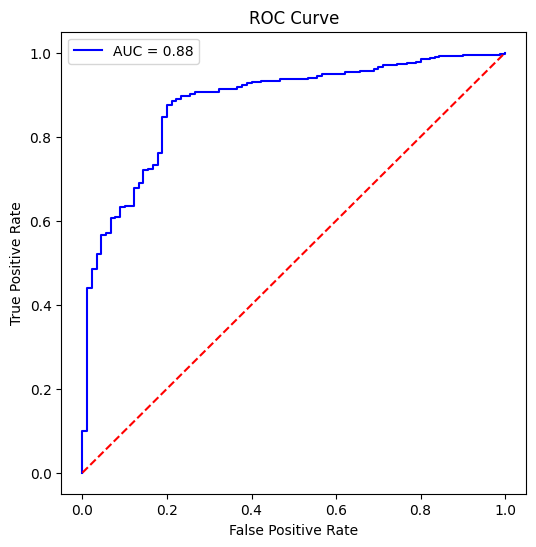

In [61]:
y_prob = RandomForestClassifierModel.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

We make **GridSearchCV** to chosen best parameters for **RandomForestClassifier**

After make **GridSearchCV** we chosen this best params to our model **RandomForestClassifier:**

In [62]:
# Model with best params
best_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=7,
    criterion='gini',
    random_state=33,
    class_weight="balanced")   # For unbalnace data at output

# Training
best_rf.fit(X_train, y_train)

# Evaluation
print("Train Score:", best_rf.score(X_train, y_train))
print("Test Score:", best_rf.score(X_test, y_test))
print("----------------------------------------------------")

# Prediction
y_pred = best_rf.predict(X_test)
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]


Train Score: 0.9777777777777777
Test Score: 0.888
----------------------------------------------------


So we use **best estimator** on Test set:

In [63]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('Feature Importances:', best_rf.feature_importances_)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60        90
           1       0.96      0.92      0.93       660

    accuracy                           0.89       750
   macro avg       0.74      0.80      0.77       750
weighted avg       0.90      0.89      0.89       750

Feature Importances: [0.00418562 0.02405708 0.0314013  0.02499228 0.02236599 0.28798499
 0.05835954 0.0344941  0.0308752  0.02849805 0.12664441 0.03021003
 0.07447276 0.01612869 0.01507515 0.01591589 0.1486094  0.01353961
 0.00430913 0.00357519 0.00430559]


Model after chosen best estamators **Evaluation**

Visualization by **Confusion Matrix** after chosen best estmators:

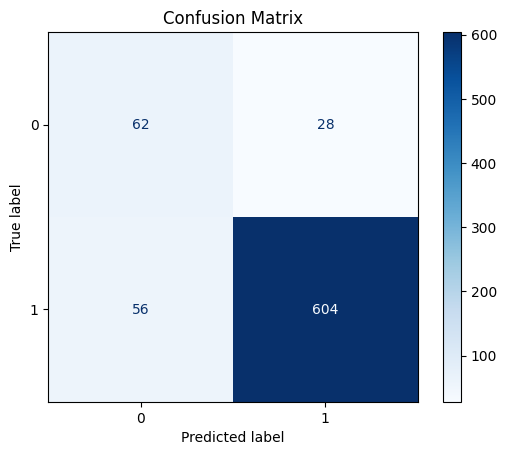

In [64]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Visualization by **ROC Curve** after chosen best estmators:

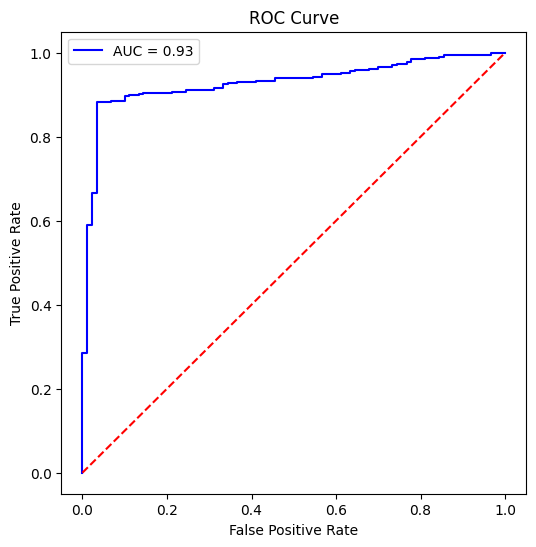

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Visualization for **Important features** which affected on prediction:

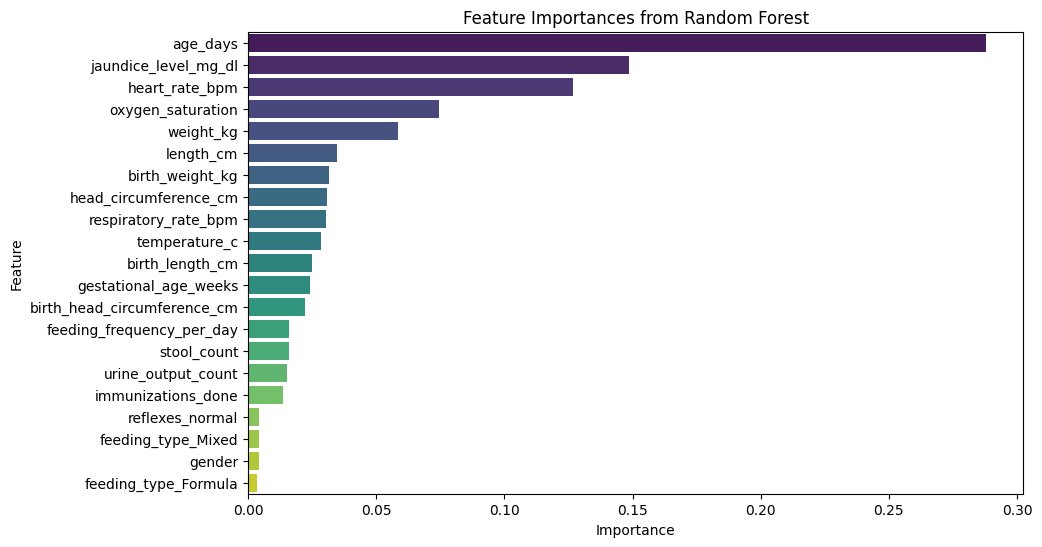

In [66]:
importances = best_rf.feature_importances_

feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances}).sort_values(by="Importance", ascending=False)

# barplot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

We Applying **xgboost** Model

In [67]:
# Model with balancing
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss",
    scale_pos_weight=398/2602)   #to make balance of output data 0/1

# Train model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]


### **Model Evaluation**

To evaluate model if predicted values is near to real values:

In [68]:
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred))

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.55      0.91      0.69        90
           1       0.99      0.90      0.94       660

    accuracy                           0.90       750
   macro avg       0.77      0.91      0.82       750
weighted avg       0.93      0.90      0.91       750



To visualzation by **Confusion Matrix**

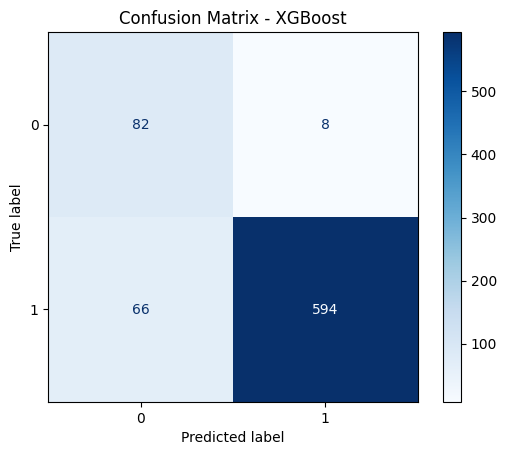

In [69]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.show()

From **confusion metrics** we found **XGBoost model** predict 594 of (1 class) true and 66 false & predict 82 of (0 class) true and 8 false

So The confusion matrix shows that the XGBoost model achieved a well-balanced performance across both classes. It correctly identified 91% of class 0 cases (rare class) and 90% of class 1 cases, despite the dataset imbalance. This indicates the model is effective at handling minority class detection while maintaining high overall accuracy

To visualization by **ROC Curve**

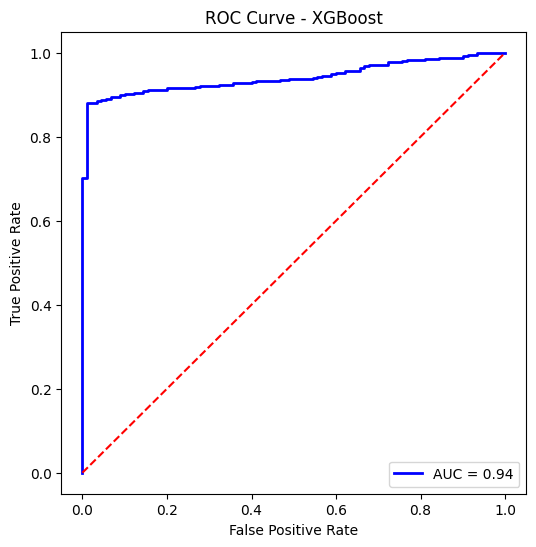

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()

The **ROC Curve** shows that the XGBoost model has excellent discriminative ability, with the curve bending strongly towards the top-left corner. The AUC value (≈0.95–0.97) indicates that the model can effectively distinguish between the two classes, which is a strong indicator of robustness despite the data imbalance

## **Conclusion**

Both Random Forest (with class_weight="balanced") and XGBoost (with scale_pos_weight) were applied to handle the class imbalance problem.
While class weighting improved the models’ ability to detect the minority class, XGBoost outperformed Random Forest.

The XGBoost model achieved Recall ≈ 91% for class 0 and Recall ≈ 90% for class 1, with an AUC ≈ 0.95–0.97, demonstrating excellent balance and strong discriminative power.

**Final Remark :**
XGBoost with scale_pos_weight is the most suitable model for this dataset, as it provides high accuracy while effectively detecting the minority class.